In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy
import pandas as pd
import os
import json

In [2]:
fr = 'hw8'

documents = os.listdir(fr)
documents = [x for x in documents if x.split('.')[-1]=='ipynb']
len(documents)

24

In [3]:
def parse_doc(doc):
    with open(doc) as f:
        x = f.read()
    x = json.loads(x)

    doc = list()
    for _ in x['cells']:
        # can change cell_type to code as well
        if _['cell_type'] == 'markdown':
            doc.append(_['source'])
    return doc

def compile_doc(d):
    s = ''
    for _ in d:
        for line in _:
            if line.startswith('#') == False:
                g = ''.join(line).strip()
                s = s + ' ' + g
    return s

print('Parsing functions ready.')

Parsing functions ready.


In [4]:
mydocs = list()
for d in documents:
    pth = os.path.join(fr, d)
    mydocs.append(compile_doc(parse_doc(pth)))

In [5]:
vect = TfidfVectorizer(min_df=1, stop_words=None)
tfidf = vect.fit_transform(mydocs)

pairwise_similarity = tfidf * tfidf.T
sim_mat = pairwise_similarity.todense()

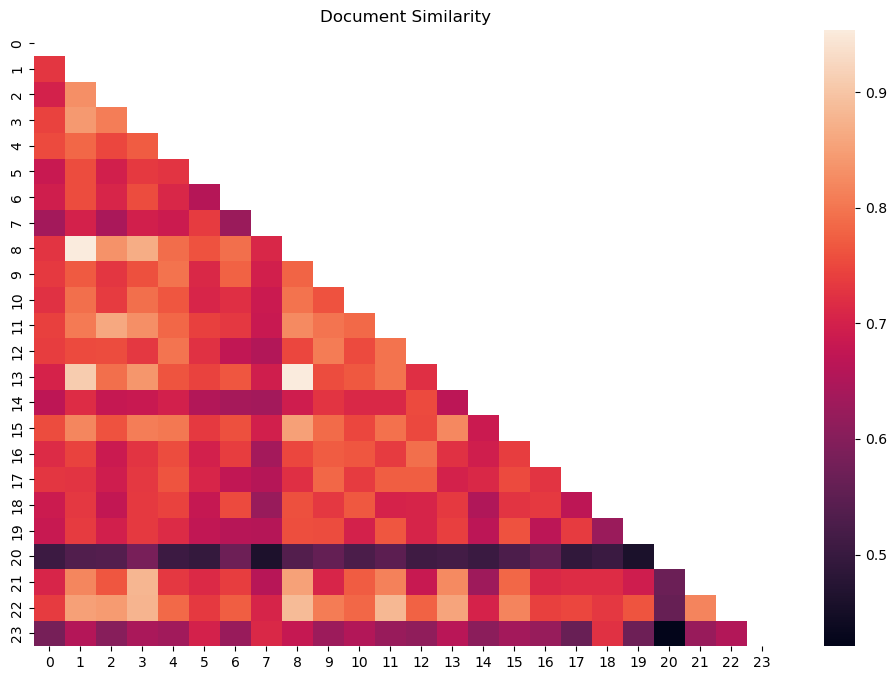

In [6]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(sim_mat)

# using the upper triangle matrix as mask
plt.figure(figsize=(12,8))
sns.heatmap(sim_mat, mask=matrix)
plt.title('Document Similarity')
plt.show()